# Regressão 01 - tarefa 01

### 1. Explorando a base de gorjetas

a. Na aula fizemos uma regressão de ```tip``` explicada por ```net_bill```. Carregue os pacotes e a base, crie as variáveis necessárias como na aula, e reproduza esta regressão.

b. Reproduza também o gráfico de dispersão dessas duas variáveis.

In [11]:
import pandas as pd
import seaborn as sns
from seaborn import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

import patsy
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import r2_score


%matplotlib inline

In [2]:
tips = sns.load_dataset("tips")
tips['tip_pct'] = tips['tip'] / (tips['total_bill'] - tips['tip'])
tips['net_bill'] = tips['total_bill'] - tips['tip']
tips.head()

,total_bill,tip,sex,smoker,day,time,size,tip_pct,net_bill
0,16.99,1.01,Female,No,Sun,Dinner,2,0.063204,15.98
1,10.34,1.66,Male,No,Sun,Dinner,3,0.191244,8.68
2,21.01,3.50,Male,No,Sun,Dinner,3,0.199886,17.51
3,23.68,3.31,Male,No,Sun,Dinner,2,0.162494,20.37
4,24.59,3.61,Female,No,Sun,Dinner,4,0.172069,20.98


In [3]:
reg = smf.ols('np.log(tip) ~ C(size) + np.log(net_bill)', data = tips).fit()

In [4]:
tips['res_log'] = reg.resid

reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            np.log(tip)   R-squared:                       0.361
Model:                            OLS   Adj. R-squared:                  0.345
Method:                 Least Squares   F-statistic:                     22.31
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           8.67e-21
Time:                        16:38:11   Log-Likelihood:                -88.627
No. Observations:                 244   AIC:                             191.3
Df Residuals:                     237   BIC:                             215.7
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3111      0.202     -1.543      0.124      -0.708       0.086
C(size)[T.2]         0.2169      0.187      1.161      0.247      -0.151       0.585
C(size)[T.3]         0.3430      0.200      1.712      0.088      -0.052       0.738
C(size)[T.4]         0.4559      0.206      2.210      0.028       0.049       0.862
C(size)[T.5]         0.4122      0.255      1.618      0.107      -0.090       0.914
C(size)[T.6]         0.6721      0.270      2.493      0.013       0.141       1.203
np.log(net_bill)     0.3810      0.059      6.420      0.000       0.264       0.498
==============================================================================
Omnibus:                        6.180   Durbin-Watson:                   1.905
Prob(Omnibus):                  0.046   Jarque-Bera (JB):                8.912
Skew:                           0.108   Prob(JB):                       0.0116
Kurtosis:                       3.911   Cond. No.                         62.1
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

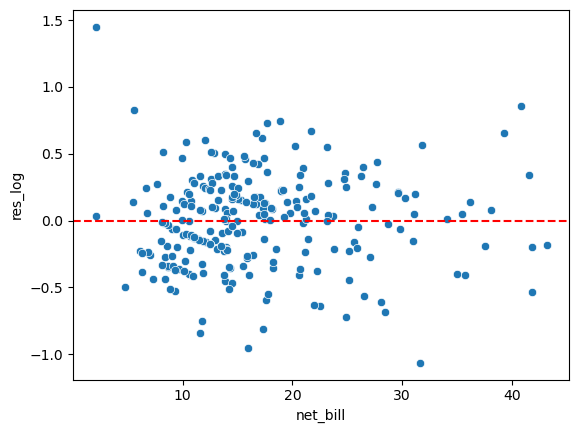

In [5]:
sns.scatterplot(x = 'net_bill', y = 'res_log', data = tips)
plt.axhline(y=0, color='r', linestyle='--')

### 2. Mudança de perspectiva

Agora ajuste um modelo de regressão de ```tip_pct``` por ```net_bill```. Construa o gráfico de dispersão correspondente.

In [6]:
# Ajustando o modelo de regressão
reg_tip_pct = smf.ols('tip_pct ~ net_bill', data=tips).fit()

# Visualizando o resumo do modelo
print(reg_tip_pct.summary())

                            OLS Regression Results                            
Dep. Variable:                tip_pct   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.088
Method:                 Least Squares   F-statistic:                     24.31
Date:                Mon, 22 Jan 2024   Prob (F-statistic):           1.52e-06
Time:                        16:44:00   Log-Likelihood:                 108.00
No. Observations:                 244   AIC:                            -212.0
Df Residuals:                     242   BIC:                            -205.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3053      0.023     13.166      0.0

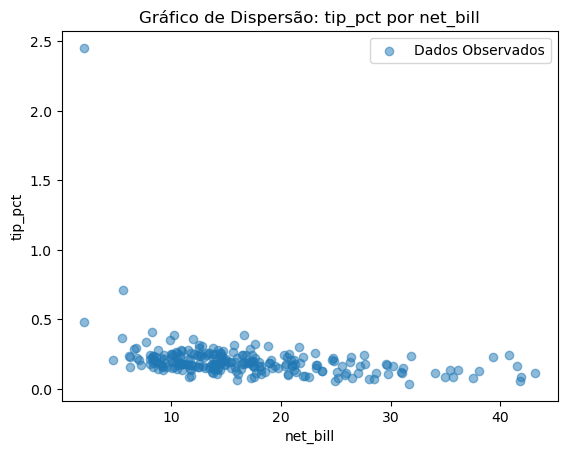

In [7]:
# Gráfico de dispersão
plt.scatter(tips['net_bill'], tips['tip_pct'], alpha=0.5, label='Dados Observados')
plt.xlabel('net_bill')
plt.ylabel('tip_pct')
plt.title('Gráfico de Dispersão: tip_pct por net_bill')
plt.legend()
plt.show()

### 3. Comente

Compare os dois gráficos e comente (de forma objetiva e suscinta) a relação entre eles e a diferença do ajuste. Podemos comparar diretamente os $R^2$s?

Com base na observação dos gráficos e nos resultados, com a mudança no modelo (de logaritmo de tip para tip_pct por net_bill) verifica-se que afetou a representação dos dados. A nova abordagem parece mais apropriada. Embora seja possível comparar diretamente os valores de 𝑅² entre os dois modelos, é importante considerar que modelos com diferentes variáveis independentes podem ter 𝑅² diferentes mesmo quando são igualmente bons em ajustar os dados, portanto 𝑅² não deve ser a única métrica de avaliação. 

### 4. Ajuste do modelo em outra escala

Com o modelo no item 3, obtenha a preditiva do valor da gorjeta:
  1. obtenha o valor predito ```pred``` para ```tip_pct``` (dica, veja o atributo ```reg.fittedvalues```)
  2. obtenha o valor predito para ```tip``` como ```tip_pct * net_bill```
  3. calcule o $R^2$ do modelo para ```tip```
  4. compare esse $R^2$ com o do item 1

In [8]:
pred_tip_pct = reg.fittedvalues

# Adicionando 'pred_tip_pct' como uma nova coluna em 'tips'
tips['pred_tip_pct'] = pred_tip_pct

# Visualizando os valores preditos
print(tips[['net_bill', 'tip_pct', 'pred_tip_pct']])

     net_bill   tip_pct  pred_tip_pct
0       15.98  0.063204      0.961532
1        8.68  0.191244      0.855170
2       17.51  0.199886      1.122512
3       20.37  0.162494      1.054002
4       20.98  0.172069      1.304248
..        ...       ...           ...
239     23.11  0.256166      1.228227
240     25.18  0.079428      1.134762
241     20.67  0.096759      1.059572
242     16.07  0.108899      0.963672
243     15.78  0.190114      0.956734

[244 rows x 3 columns]


In [9]:
# Calculando o valor predito para tip usando tip_pct * net_bill
tips['pred_tip'] = tips['tip_pct'] * tips['net_bill']

# Visualizando os valores preditos
print(tips[['net_bill', 'tip_pct', 'pred_tip']])

     net_bill   tip_pct  pred_tip
0       15.98  0.063204      1.01
1        8.68  0.191244      1.66
2       17.51  0.199886      3.50
3       20.37  0.162494      3.31
4       20.98  0.172069      3.61
..        ...       ...       ...
239     23.11  0.256166      5.92
240     25.18  0.079428      2.00
241     20.67  0.096759      2.00
242     16.07  0.108899      1.75
243     15.78  0.190114      3.00

[244 rows x 3 columns]


In [12]:
# Calculando R-squared
r_squared_tip = r2_score(tips['tip'], tips['pred_tip'])

# Visualizando o valor de R-squared
print("R-squared para o modelo de tip_pct * net_bill:", r_squared_tip)

R-squared para o modelo de tip_pct * net_bill: 1.0


In [13]:
# R-squared anterior do modelo original
print("R-squared para o modelo original (np.log(tip) ~ C(size) + np.log(net_bill)):", reg.rsquared)

# R-squared atual do modelo tip_pct * net_bill
print("R-squared para o modelo de tip_pct * net_bill:", r_squared_tip)

R-squared para o modelo original (np.log(tip) ~ C(size) + np.log(net_bill)): 0.3609869602736895
R-squared para o modelo de tip_pct * net_bill: 1.0


A comparação dos valores de  𝑅2  revela uma diferença notável entre os dois modelos:
Modelo Original (np.log(tip) ~ C(size) + np.log(net_bill)):
  𝑅2 = 0.361: O modelo original explica aproximadamente 36.1% da variabilidade em tip com base nas variáveis independentes incluídas (tamanho e logaritmo de net_bill).
  
Modelo tip_pct * net_bill:
  R2 = 1.0: O novo modelo, que prevê tip diretamente como o produto de tip_pct e net_bill, parece ter um ajuste perfeito (R2 = 1). Isso indica que o novo modelo explica completamente a variabilidade em tip com base nas variáveis consideradas.
  
O modelo que utiliza a multiplicação de tip_pct por net_bill apresenta um R2 de 1.0, indicando que ele explica completamente a variação em tip com base nessas variáveis. Isso contrasta com o modelo original, que tinha um R2 de 0.361 e explicava apenas uma parte da variabilidade em tip. A mudança no modelo resultou em um ajuste muito mais preciso aos dados, pelo menos em termos do R2.
  